In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
users_df = pd.read_csv('users.csv')
series_df = pd.read_csv('series.csv')
transactions_df = pd.read_csv('transactions.csv')

# Data Cleaning
users_df.drop_duplicates(inplace=True)
series_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

# Convert 'date' column to datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# Merge Tables
merged_df = transactions_df.merge(users_df, on='user_id').merge(series_df, on='series_id', suffixes=('', '_series'))

# Ensure 'date' is correctly set as the index
merged_df.set_index('date', inplace=True)

# Filter data by platform
voyce_df = merged_df[merged_df['platform'] == 'VoyceMe']
competitor1_df = merged_df[merged_df['platform'] == 'Competitor1']
competitor2_df = merged_df[merged_df['platform'] == 'Competitor2']

# Aggregate to calculate daily trends for each platform
voyce_daily = voyce_df.resample('D').agg({'views': 'sum', 'search_count': 'sum'}).reset_index()
competitor1_daily = competitor1_df.resample('D').agg({'views': 'sum', 'search_count': 'sum'}).reset_index()
competitor2_daily = competitor2_df.resample('D').agg({'views': 'sum', 'search_count': 'sum'}).reset_index()


# Total views and searches for VoyceMe
total_voyce_views = voyce_daily['views'].sum()
total_voyce_searches = voyce_daily['search_count'].sum()

# Total views and searches for Competitor1
total_competitor1_views = competitor1_daily['views'].sum()
total_competitor1_searches = competitor1_daily['search_count'].sum()

# Total views and searches for Competitor2
total_competitor2_views = competitor2_daily['views'].sum()
total_competitor2_searches = competitor2_daily['search_count'].sum()


print(f'voyce views: ', total_voyce_views)
print(f'voyce searches: ', total_voyce_searches)

print(f'competitor1 views: ', total_competitor1_views)
print(f'competitor1 searches: ', total_competitor1_searches)

print(f'competitor2 views: ', total_competitor2_views)
print(f'competitor2 searches: ', total_competitor2_searches)



voyce views:  506399
voyce searches:  65931
competitor1 views:  235174
competitor1 searches:  32858
competitor2 views:  241656
competitor2 searches:  34958


In [22]:
# Aggregate by series and genre
series_genre_performance = merged_df.groupby(['title', 'genre']).agg({'views': 'sum', 'search_count': 'sum'}).reset_index()

# Print total views and search for each series
print("Total views and search count for each series:")
print(series_genre_performance[['title', 'views', 'search_count']])

# Aggregate by genre
genre_performance = merged_df.groupby(['genre']).agg({'views': 'sum', 'search_count': 'sum'}).reset_index()

# Print total views and search for each genre
print("\nTotal views and search count for each genre:")
print(genre_performance[['genre', 'views', 'search_count']])

Total views and search count for each series:
      title   views  search_count
0  series_1  114216         15647
1  series_2  122975         19227
2  series_3  112299         17123
3  series_4  121726         16065
4  series_5  122875         15735
5  series_6  135287         17157
6  series_7  119930         18893
7  series_8  133921         13900

Total views and search count for each genre:
        genre   views  search_count
0   Adventure  245850         34962
1     Fantasy  235942         31712
2  Historical  253851         32793
3      Sci-Fi  247586         34280


# Data Visualization

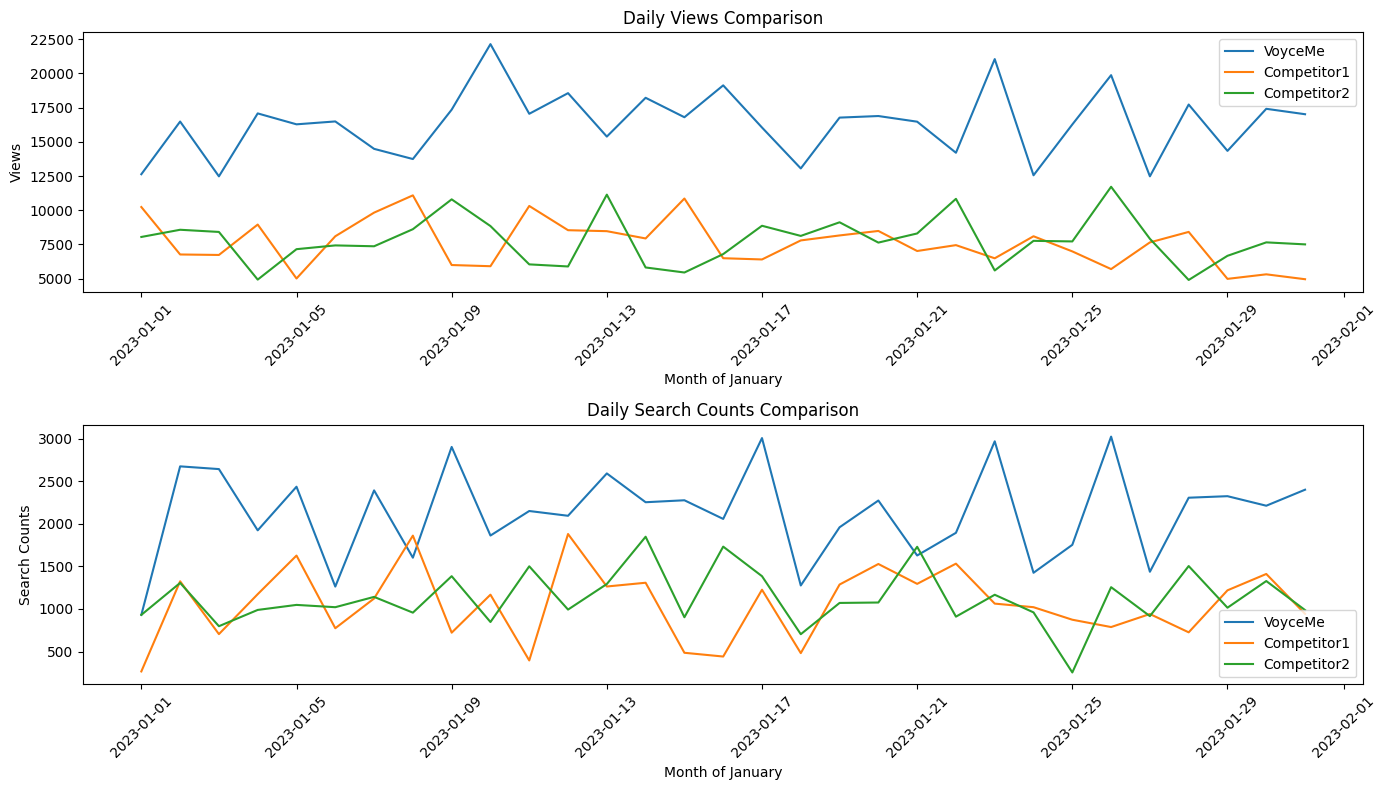

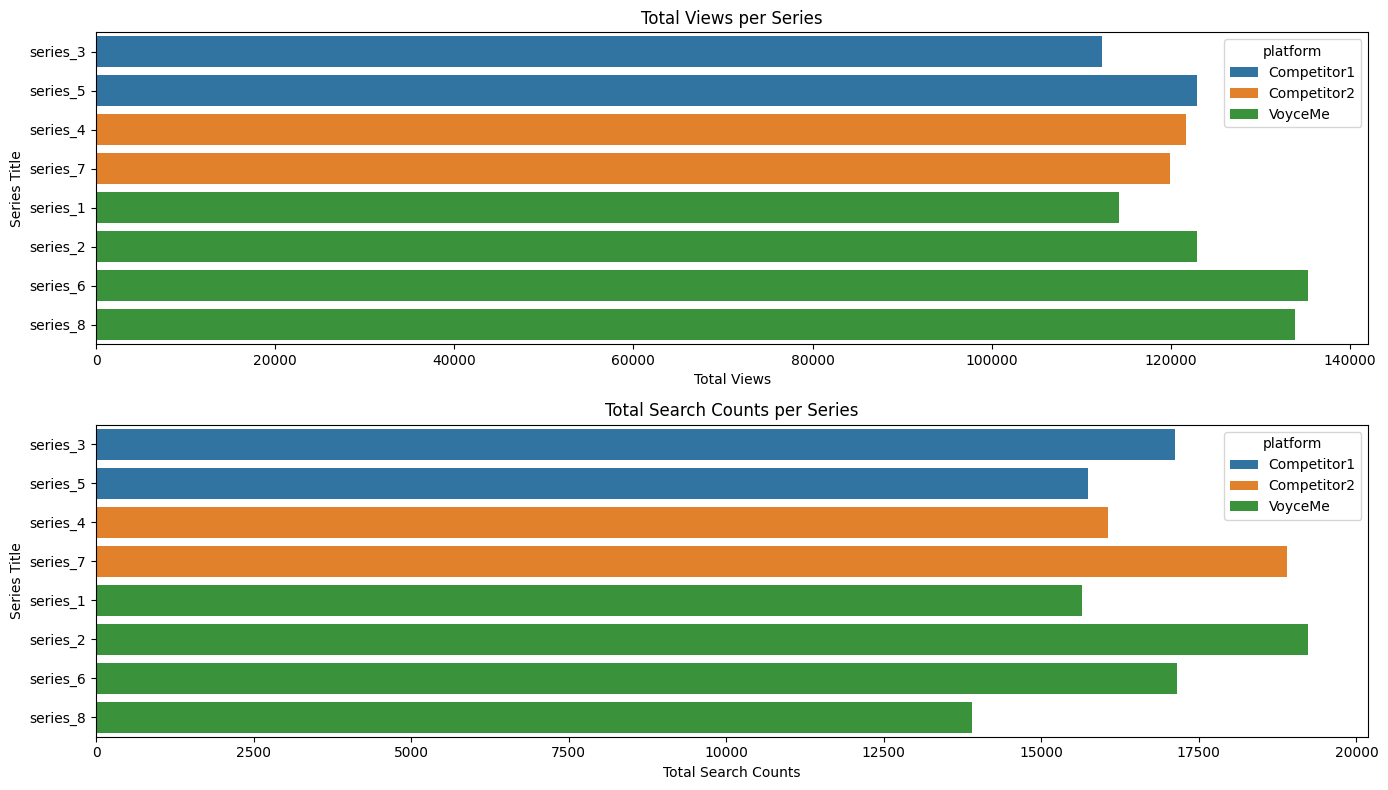

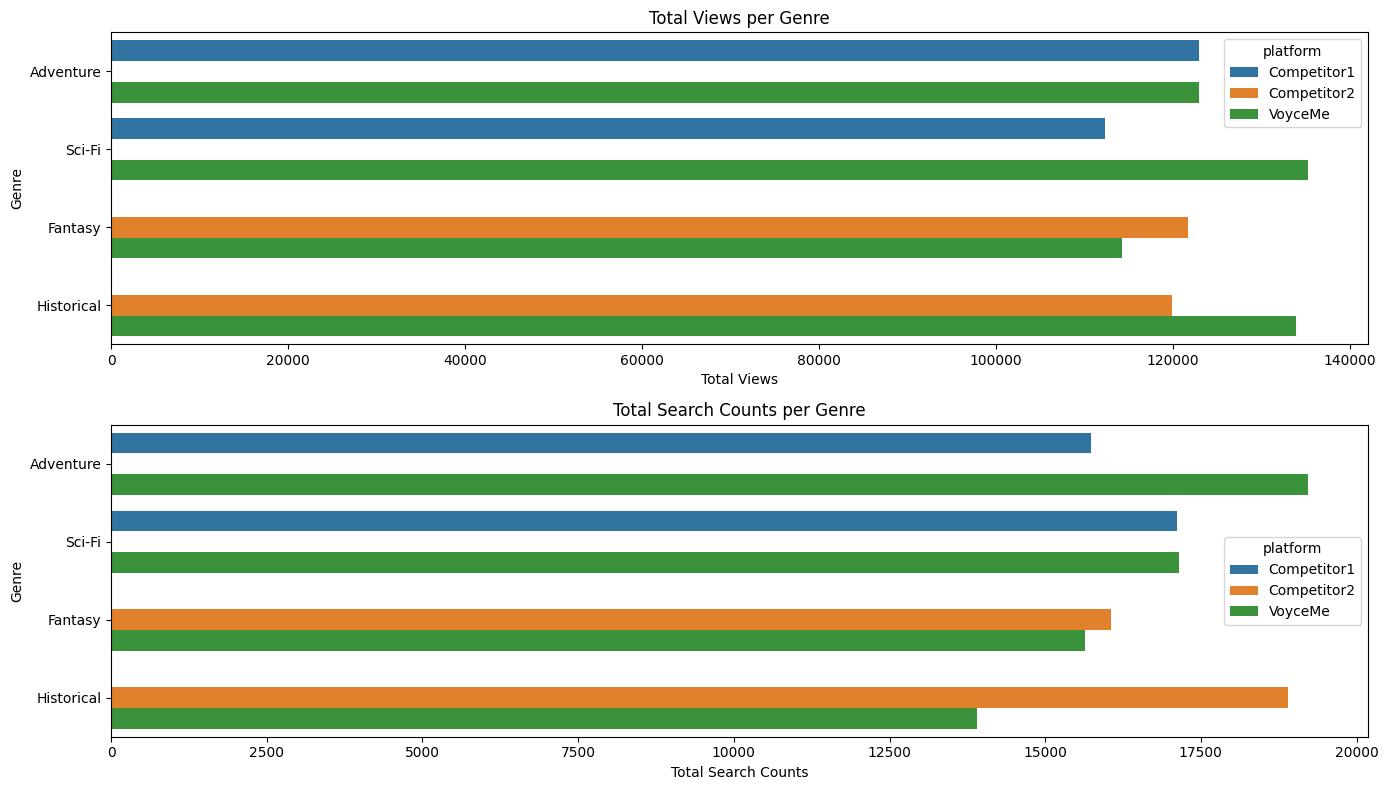

In [20]:

# Visualization
plt.figure(figsize=(14, 8))

# Plot views
plt.subplot(2, 1, 1)
sns.lineplot(data=voyce_daily, x='date', y='views',  label='VoyceMe')
sns.lineplot(data=competitor1_daily, x='date', y='views',  label='Competitor1')
sns.lineplot(data=competitor2_daily, x='date', y='views',  label='Competitor2')
plt.title('Daily Views Comparison')
plt.xlabel('Month of January')
plt.ylabel('Views')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot search counts
plt.subplot(2, 1, 2)
sns.lineplot(data=voyce_daily, x='date', y='search_count', label='VoyceMe')
sns.lineplot(data=competitor1_daily, x='date', y='search_count', label='Competitor1')
sns.lineplot(data=competitor2_daily, x='date', y='search_count', label='Competitor2')
plt.title('Daily Search Counts Comparison')
plt.xlabel('Month of January')
plt.ylabel('Search Counts')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Summary statistics for series performance
series_performance = merged_df.groupby(['platform', 'title']).agg({'views': 'sum', 'search_count': 'sum'}).reset_index()

plt.figure(figsize=(14, 8))

# Plot total views per series
plt.subplot(2, 1, 1)
sns.barplot(data=series_performance, x='views', y='title', hue='platform')
plt.title('Total Views per Series')
plt.xlabel('Total Views')
plt.ylabel('Series Title')

# Plot total search counts per series
plt.subplot(2, 1, 2)
sns.barplot(data=series_performance, x='search_count', y='title', hue='platform')
plt.title('Total Search Counts per Series')
plt.xlabel('Total Search Counts')
plt.ylabel('Series Title')

plt.tight_layout()
plt.show()

# Aggregate by genre
genre_performance = merged_df.groupby(['platform', 'genre']).agg({'views': 'sum', 'search_count': 'sum'}).reset_index()

plt.figure(figsize=(14, 8))

# Plot total views per genre
plt.subplot(2, 1, 1)
sns.barplot(data=genre_performance, x='views', y='genre', hue='platform')
plt.title('Total Views per Genre')
plt.xlabel('Total Views')
plt.ylabel('Genre')

# Plot total search counts per genre
plt.subplot(2, 1, 2)
sns.barplot(data=genre_performance, x='search_count', y='genre', hue='platform')
plt.title('Total Search Counts per Genre')
plt.xlabel('Total Search Counts')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()